<div align='center' ><img src='https://raw.github.com/davidrpugh/computational-econ-labs/master/graduate/images/sgpe-logo.jpg' width="1200" height="100"></div>
<div align='center' ><img src='https://raw.github.com/davidrpugh/computational-econ-labs/master/graduate/images/sirelogo.jpg' width="1200" height="100"></div>

# *Numeric Methods for Economists:* Introduction to Dynamic Programming

Dynamic programming is a fundamental tool of economic analysis. The objective of this lab is to show you how to solve, via numerical dynamic programming, a textbook dynamic stochastic general equilibrium (DSGE) model of optimal consumption/savings. For those interested in learning more about numerical dynamic programming, I suggest starting with John Stachurski and Thomas Sargent's excellent set of [Python-based online lecture notes](http://quant-econ.net/). The lecture notes are also available as a [PDF](http://quant-econ.net/_static/pdfs/quant-econ.pdf). 

# A model of optimal consumption/savings

In this section I fully specify the decision problems faced by firms and households in a stochastic optimal savings with both inelastic labor supply. I begin by deriving the equilibrium conditions and the dynamic programming formulation of a model where the only choice variable for the household is consumption. 

## Firm behavior
There are a large number of firms, each with access to an identical constant returns to scale, CES production technology.

$$ y_t = f(k_t, l_t, z_t) = e^{z_t}\bigg(\alpha k_t^{\rho} + (1 - \alpha)l_t^{\rho}\bigg)^{\frac{1}{\rho}} \tag{1.1}$$

where $0 < \alpha < 1$ and $\rho = \frac{\sigma - 1}{\sigma}$. Recall that $f_k > 0$, $f_{kk} < 0$, and that $f$ satisfies the usual Inada conditions. Total factor productivity shocks, $z_t$, follow a standard AR(1) process.

$$ z_t = \rho z_{t-1} + \epsilon_t,\ \epsilon \sim N(0, \sigma) \tag{1.2}$$

All markets (i.e., for both factors of production and the final output good) are competitive and therefore capital and labor earn their respective marginal products, and firms earn zero profits. 
\begin{align}
r_t =& \alpha e^{z_t} k_t^{\rho - 1}\bigg(\alpha k_t^{\rho} + (1 - \alpha)l_t^{\rho}\bigg)^{\frac{1}{\rho}-1} = \left(\frac{\alpha k_t^{\rho-1}}{\alpha k_t^{\rho} + (1 - \alpha)l_t^{\rho}}\right)f(k_t,l_t,z_t) \tag{1.3}\\
w_t =& (1 - \alpha) e^{z_t} l_t^{\rho-1}\bigg(\alpha k_t^{\rho} + (1 - \alpha)l_t^{\rho}\bigg)^{\frac{1}{\rho}-1} = \left(\frac{(1-\alpha) l_t^{\rho-1}}{\alpha k_t^{\rho} + (1 - \alpha)l_t^{\rho}}\right)f(k_t,l_t,z_t) \tag{1.4}\\
y_t =& r_tk_t + w_tl_t \tag{1.5}
\end{align} 

## Household behavior
There are a large number of identical households with constant relative risk aversion (CRRA) preferences: 

$$ u(c_t) = \frac{c_t^{1-\theta} - 1}{1 - \theta} \tag{1.6}$$

where the parameter $0<\theta$ is the coefficient of relative risk aversion. The representative household's objective is to choose an infinite consumption sequence, $\{c_t\}_{t=0}^{\infty}$, in order to 

$$ \max \ E\left\{\sum_{t=0}^{\infty} \beta^t u(c_t)\right\} \tag{1.7} $$

subject to the following constraints:

\begin{align}
c_t + i_t =& w_tl_t + r_t k_t \tag{1.8}\\
k_{t+1} =& (1-\delta)k_t + i_t \tag{1.9} 
\end{align}

where $0 < \beta < 1$ is the discount factor.

The representative household is endowed with a single unit of labor which we assume it supplies inelastically to firms (i.e., we assume that household chooses $l_t=1$ regardless of the real wage). The first order necessary condition for the household's decision problem is the consumption Euler equation

$$ c_t^{-\theta} = \beta E\left\{(1 + r_{t+1} - \delta)c_{t+1}^{-\theta} | z_t\right\} \tag{1.8}$$

which, together with the budget constraint

$$ c_t + k_{t+1} = w_t + (1 + r_t - \delta)k_t \tag{1.9} $$

completely specifies the the behavior of the representative household.

## General Equilibrium
Equations 1.3, 1.4, 1.5, 1.8, and 1.9 reduce to a  system of two non-linear equations in two unknowns, $k$ and $c$ that describe the equilibrium of the model.

\begin{align}
c_t^{-\theta} =& \beta E\left\{\left(1 + \alpha e^{z_{t+1}}k_{t+1}^{\rho-1}\bigg(\alpha k_{t+1}^{\rho} + (1 - \alpha)\bigg)^{\frac{1}{\rho}-1} - \delta\right)c_{t+1}^{-\theta} \bigg| z_t\right\} \tag{1.10}\\
k_{t+1} =& (1 - \delta)k_t + e^{z_{t+1}}\bigg(\alpha k_{t+1}^{\rho} + (1 - \alpha)\bigg)^{\frac{1}{\rho}} - c_t \tag{1.11}
\end{align}  
 

## Dynamic programming specification
The stochastic optimal savings model with inelastic labor supply can be formulated as a simple dynamic programming problem with capital, $k$, and productivity $z$ as the only state variables. The most natural control variable is, perhaps, $c$. 

\begin{align} 
V(k, z) =& \max_{c\in \Gamma(k, z)}\ \frac{c^{1-\theta}-1}{1-\theta} + \beta E\bigg\{V(k', z') \bigg| z\bigg\} \tag{1.13}\\
\Gamma(k, z) =& (1 - \delta)k + f(k, z) \tag{1.14} \\
k' =& (1 - \delta)k + f(k, z) - c \tag{1.15}\\
z' =& \rho_z z + \epsilon',\ \epsilon \sim N(0, \sigma_z) \tag{1.16}\\
\end{align}

Equation 1.13 is the familiar Bellman equation. Equation 1.14 defines the set of feasible values of the control (in this case consumption) as a function of the current states. **Note that this definition of $\Gamma(k,z)$ assumes that capital can be "eaten".** Equations 1.15 and 1.16 are the equations of motion for capital and the productivity shock, respectively.

We are going to replace 1.13 with 

$$W(k, z) = \max_{c \in \Gamma(k, z)}\ (1-\beta)\frac{c^{1-\theta}-1}{1-\theta}  + \beta E\bigg\{W(k', z') \bigg| z\bigg\}. \tag{1.13b} $$

Why? Note that the current value, $W(k,z)$, is now a convex combination of the flow payoff, $u(c)$, and the expected future value (conditional on the current productivity shock!), $E\bigg\{W(k', z') \bigg| z\bigg\}$. Transforming the value function in this manner makes the computation of the value function more numerically stable and efficient. **This transformation, which is really just a rescaling of utility by a positive constant, will not impact the optimal policy function in any way**.

The optimal policy function $c(k, z)$ obeys the following first order necessary condition for optimality.  

$$ 0 = (1 - \beta)c(k, z)^{-\theta} - \beta E\left\{W'(k', z') \bigg| z\right\} \tag{1.17}$$

The envelope theorem applied to equation 1.14b yields 

$$ W'(k, z) = \beta\left(1 + \alpha e^{z}k^{\rho-1}\bigg(\alpha k^{\rho} + (1 - \alpha)\bigg)^{\frac{1}{\rho}-1} - \delta\right)E\left\{W'(k', z') \bigg| z\right\} \tag{1.18} $$

which together with equation 1.17 implies that

$$ (1-\beta)c(k, z)^{-\theta}\left(1 + \alpha e^{z}k^{\rho-1}\bigg(\alpha k^{\rho} + (1 - \alpha)\bigg)^{\frac{1}{\rho}-1} - \delta\right) = W'(k, z). \tag{1.19} $$

Thus the solution to the dynamic programming problem specified in equations 1.13b through 1.16 is a policy function, $c(k, z)$, and a value function, $W(k, z)$, that jointly satisfy equations 1.19 and 

$$ W(k, z) = (1-\beta)\frac{c(k, z)^{1-\theta}-1}{1-\theta} + \beta E\left\{W\bigg((1-\delta)k + e^{z}\bigg(\alpha k^{\rho} + (1 - \alpha)\bigg)^{\frac{1}{\rho}} - c(k, z), \rho_z z + \epsilon')\right\}. \tag{1.20}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import interpolate, optimize, stats

### Exercise:

Using `alpha`, `sigma`, `delta`, `theta`, and `rho_z` as parameters, fill in the blanks in the code below in order to define Python functions for equations 1.1, 1.2, 1.3, 1.6, 1.11, and 1.14. Confirm that your functions are correct before moving forward!

In [2]:
# equation 1.1
def ces_output(k, z=0.0):
    """
    Output is generated by a CES production function. Note that output is a 
    function of state variables (i.e., capital and possibly a productivity shock).
    
    Arguments:
    
        k: (array) Current value of capital. Inherited from previous period!
        z: (array) Current value of the productivity shock.
    
    Returns:
    
        y: (array) Output produced from k and z
    
    """
    rho = (sigma - 1) / sigma
    
    # nest Cobb-Douglas output as special case
    if rho == 0:
        y = np.exp(z) * k**alpha
    else:
        y = np.exp(z) * (alpha * k**rho + (1 - alpha))**(1 / rho)
    
    return y


In [3]:
# confirm that ces_output is functioning correctly...
alpha = 0.5
sigma = 1e6
ces_output(4, 0)

2.4999995181380563

In [4]:
# equation 1.2
def productivity_motion(z, eps):
    """
    Equation of motion for total factor productivity.
    
    Arguments:
    
        z:   (array) Current value of the total factor productivity.
        eps: (array) Productivity shock.
    
    Returns:
    
        zplus: (array) Next period's value of capital.
        
    """
    zplus = rho_z * z + eps
    return zplus

In [5]:
# confirm that productivity_motion is functioning correctly...
rho_z = 0.95
productivity_motion(1, 0)

0.95

In [7]:
# equation 1.3
def ces_mpk(k, z=0.0):
    """
    Marginal product of capital for the CES production function.
    
    Arguments:
    
        k: (array) Current value of capital. Inherited from previous period!
        z: (array) Current value of the productivity shock.
    
    Returns:
    
        mpk: (array) Output produced from k.
    
    """
    rho = (sigma - 1) / sigma
    
    # nest Cobb-Douglas output as special case
    if rho == 0:
        mpk = alpha * (ces_output(k, z) / k)
    else:
        mpk = (alpha * k**(rho - 1) / (alpha * k**rho + (1 - alpha))) * ces_output(k, z)
    
    return mpk

In [8]:
# confirm that ces_mpk is functioning correctly...
alpha = 0.5
sigma = 1e6
ces_mpk(4, 0)

0.49999976499814425

In [11]:
# equation 1.6
def crra_utility(c):
    """
    Agent has CRRA preferences over consumption. Function makes use of np.log 
    and np.exp functions which are optimized for array arguments.

    Arguments:
    
        c:     (array) Current value of consumption.
    
    Returns: (array-like) 
    
        utility: (array) Utility from consumption.
    
    """
    # nest log utility as a special case
    if theta == 1:
        utility = np.log(c) 
    else:
        utility = (c**(1 - theta) - 1) / (1 - theta)
        
    return utility

In [12]:
# confirm that crra_utility is working!
theta = 1e-6
crra_utility(4.0)

2.9999974548238537

In [13]:
# equation 1.11
def capital_motion(k, z, c):
    """
    Equation of motion for capital.
    
    Arguments:
    
        k: (array) Current value of capital. Inherited from previous period!
        z: (array) Current value of the productivity shock.
        c: (array) Current value of consumption.
    
    Returns:
    
        kplus: (array) Next period's value of capital.
        
    """
    kplus = ces_output(k, z) + (1 - delta) * k - c
    return kplus

In [14]:
# confirm that capital_motion is functioning correctly...
alpha = 0.5
sigma = 1e0
delta = 1.0
capital_motion(4, 0, 1)

1.0

In [15]:
# equation 1.14
def Gamma(k, z=0.0):
    """
    The correspondence of feasible controls given current state.

    Arguments:
    
        k:     (array) Current value of capital. Inherited from previous period!
        z:     (array) Current value of the productivity shock.
    
    Returns: 
        
        c_upper: (scalar) The upper bound on the correspondence of feasible 
                 controls given current state.
        
    """
    # note that we are allowing capital to be eaten!
    c_upper = ces_output(k, z) + (1 - delta) * k
    return c_upper

In [16]:
# confirm that Gamma is working
alpha = 0.5
sigma = 1e6
delta = 1.0
Gamma(4, 0)

2.4999995181380563

# Solving the model:

From above, our objective is to find functions $c(k,z)$ and $W(k, z)$ that jointly solve the following system of functional equations.

\begin{align}
W'(k, z) =& (1-\beta)c(k, z)^{-\theta}\left(1 + \alpha e^{z}k^{\rho-1}\bigg(\alpha k^{\rho} + (1 - \alpha)\bigg)^{\frac{1}{\rho}-1} - \delta\right) \\
W(k, z) =& (1-\beta)\frac{c(k, z)^{1-\theta}-1}{1-\theta} + \beta E\left\{W\bigg((1-\delta)k + e^{z}\bigg(\alpha k^{\rho} + (1 - \alpha)\bigg)^{\frac{1}{\rho}} - c(k, z), \rho_z z + \epsilon')\right\}
\end{align}

The *key* theorem in infinite horizon dynamic programming is the contraction mapping theorem applied to the Bellman equation.  First, a couple of definitions:

* A **map** $T:Y \rightarrow Z\ $ on ordered spaces $Y$ and $Z$ is **monotone** if and only if $y_1 \ge y_2 \implies Ty_1 \ge Ty_2$.
* A **map** $T:Y \rightarrow Y\ $ on a metric space $Y$ is a **contraction mapping** with modulus $\beta \lt 1$ if and only if $||Ty_1 - Ty_2|| \le \beta||y_1 - y_2||.$

**Theorem:** If $X$ is compact (i.e., closed and bounded), $\beta \lt 1$, and $u$ is bounded, then the map

$$ TW = \max_{c \in \Gamma(k, z)} (1-\beta)u(c) + \beta E\left\{W(k', z')| z\right\} $$

is monotone in $W$, and is a contraction mapping with modulus $\beta$ in the space of bounded functions, and has a *unique* fixed point.

Although the assumption of boundedness and compactness of the state space required for the theorem to hold seem restrictive, they are not! We care only about **numerically feasible** dynamic programming problems which in general can examine only compact state spaces. The contraction mapping theorem tells us how to constuct an operator, $T$, that transforms a value function into another value function and that repeated application of this operator generates a sequence of functions that eventually converges to a unique fixed point (i.e., the "optimal" value function)!

Before I explain the basic algorithm that we will use to solve for the value function and its implied optimal policy, we need to define a couple of maps. The map $T$, which is called the Bellman operator, takes next period's value function, $V^+$, and maps it into the current value function, $W$ and is defined by

$$ W = \max_{c\in\Gamma(k, z)} (1-\beta)u(c) + \beta E\left\{W^+(k', z')| z\right\} \equiv TW^+.$$ 

We also need to define the map $\mathcal{U}$, called the "greedy" operator, which maps next period's value function into the current policy function, $U$:

$$ U = \arg \max_{c\in\Gamma(k, z)} (1-\beta)u(c) + \beta E\left\{W^+(k', z')| z\right\} \equiv \mathcal{U}W^+.$$ 

## Value function iteration

The most basic numerical procedure for computing $W^*$ is called *value function iteration* is directly motivated by the contraction mapping properties of the Bellman equation.  Specifically, value function iteration computes a sequence of functions

$$ W^{l+1} = TW^l,\ l=0, 1, 2, \dots .$$

The contraction mapping theorem tells us that the sequence $W^l$ will converge to the infinite-horizon value function for *any* initial guess $W^0$.  Additionally, the contraction mapping theorem implies that the sequence of policy functions, $U^l$, as defined by 

$$U^{l+1} = \mathcal{U}U^l\ l=0, 1, 2, \dots$$ 

will also converge to the optimal policy function. In theory, convergence is achieved only asymptotically. In practice, we will just iterate the operator $T$ until successive value functions change very little (and/or successive policy functions do not change). Below is some pseudo-code for computing the function, $W$, using value function iteration.

    while True:
        # apply the Bellman operator, T
        next_w = T(current_w, **kwargs)
        
        # compare successive iterates using some distance metric
        change = np.max(np.abs(next_w(pts) - current_w(pts)))
        n_iter += 1
    
        # check for convergence
        if change < tol:
            if mesg == True:
                print "After", n_iter, "iterations, the final change is", change
            final_w = next_w
            break
        
        current_w = next_w
        
Once the code above terminates, we can compute the optimal policy by applying the map $\mathcal{U}$ to `final_w`.  

## Approximation of value and policy functions

In order to implement value function iteration, we need to first choose a method for representing the functions used to approximate successive value and policy function iterates on the computer. Two widely used function approximation schemes are linear interpolation and cubic spline interpolation. 

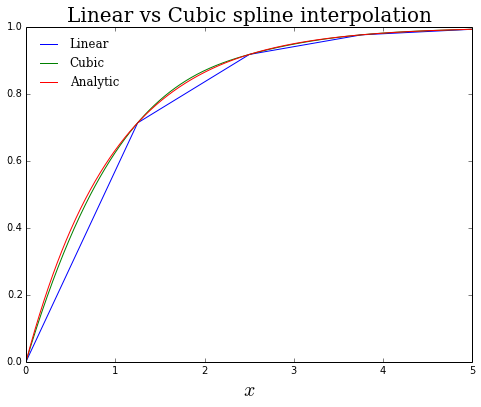

In [17]:
# grid of values to use as interpolation nodes
xgrid = np.linspace(0, 5, 5)

# values of the function we wish to approximate at the interpolation nodes
vals = 1 - np.exp(-xgrid)

# both spline interpolation nests linear interpolation as a special case
linear_interp = interpolate.UnivariateSpline(xgrid, vals, k=1, s=0)
cubic_interp  = interpolate.UnivariateSpline(xgrid, vals, k=3, s=0)

# plot the approximating functions as well as the true function
plt.figure(figsize=(8,6))
plot_grid = np.linspace(0, 5, 1000)
plt.plot(plot_grid, linear_interp(plot_grid), 'b', label='Linear')
plt.plot(plot_grid, cubic_interp(plot_grid), 'g', label='Cubic')
plt.plot(plot_grid, 1 - np.exp(-plot_grid), 'r', label='Analytic')

# axes, labels, title, etc
plt.xlabel('$x$', fontsize=20)
plt.title('Linear vs Cubic spline interpolation', fontsize=20, family='serif')
plt.legend(loc='best', frameon=False, prop={'family':'serif'})

plt.show()

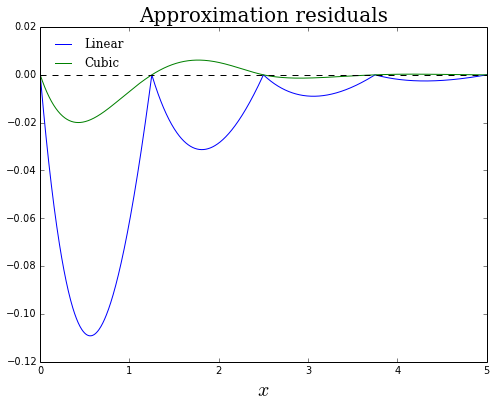

In [18]:
# compute the residuals
linear_resid = linear_interp(plot_grid) - (1 - np.exp(-plot_grid))
cubic_resid  = cubic_interp(plot_grid) - (1 - np.exp(-plot_grid))

# plot the residuals
plt.figure(figsize=(8,6))
plt.plot(plot_grid, linear_resid, 'b', label='Linear')
plt.plot(plot_grid, cubic_resid, 'g', label='Cubic')
plt.axhline(0, ls='dashed', color='k')

# axes, labels, title, etc
plt.xlabel('$x$', fontsize=20)
plt.title('Approximation residuals', fontsize=20, family='serif')
plt.legend(loc='best', frameon=False, prop={'family':'serif'})

plt.show()

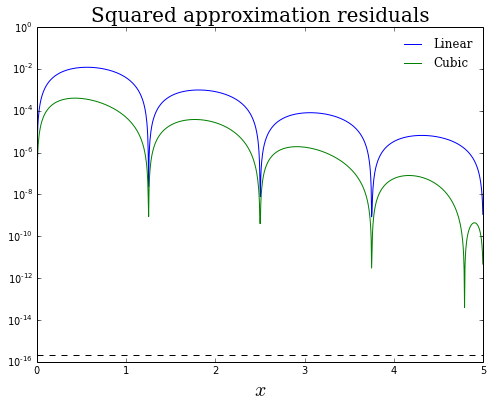

In [19]:
# compute the squared residuals
linear_resid = linear_interp(plot_grid) - (1 - np.exp(-plot_grid))
cubic_resid  = cubic_interp(plot_grid) - (1 - np.exp(-plot_grid))

# plot the residuals
plt.figure(figsize=(8,6))
plt.plot(plot_grid, linear_resid**2, 'b', label='Linear')
plt.plot(plot_grid, cubic_resid**2, 'g', label='Cubic')

# demarcate machine epsilon
plt.axhline(np.finfo('float').eps, ls='dashed', color='k')

# axes, labels, title, etc
plt.xlabel('$x$', fontsize=20)
plt.yscale('log')
plt.ylim(1e-16, 1e0)
plt.title('Squared approximation residuals', fontsize=20, family='serif')
plt.legend(loc='best', frameon=False, prop={'family':'serif'})

plt.show()

Although cubic spline interpolation strictly dominates linear interpolation in this example, linear interpolation is generally more robust (and has the added benefit that it will preserve many important properties, such as monotonicity, of the function being approximated).

## Coding the maps $T$ and $\mathcal{U}$:

Now that we have decided on a method for approximating the value and policy functions, we are ready to discuss constructing the Bellman and greedy operators.

In [20]:
def maximize(w, lower, upper):
    """
    Wraps fminbound to find the value the minimizes -v on the closed interval
    [lower, upper] using Brent's method.

    Arguments:

        w:     (callable) A function representing the current value function 
               iterate.
        lower: (scalar) Lower bound on the correspondence of feasible controls.
        upper: (scalar) Upper bound on the correspondence of feasbile controls.

    Returns: 

        pol:    Value of the control that maximizes the function w.
        
    """  
    pol = optimize.fminbound(lambda x: -w(x), lower, upper)
    return pol

def deterministic_bellman_operator(w):
    """
    Naive Bellman operator for the optimal savings model with inelastic 
    labor supply. Approximation of the value function is done using 
    linear interpolation.

    Arguments:

        w:  (object) An instance of the Univariatespline class.

    Returns: 

        Tw: (object) A callable UnivariateSpline object.

    """
    vals = np.empty(Nk)
    
    # loop over each state and...
    for i, k in enumerate(Gk):
        
        def obj(c):
            """Current value function."""
            # next period's value of capital (don't forget to set z=0)
            kplus = capital_motion(k, 0, c)
            
            # compute the value function
            tmp_w = (1 - beta) * crra_utility(c) + beta * w(kplus)
            
            return tmp_w
        
        # compute the maximizer
        pol = maximize(obj, 0, Gamma(k))
        # store the new value and policy
        vals[i] = obj(pol)
    
    # interpolate!
    Tw = interpolate.UnivariateSpline(Gk, vals, k=1, s=0)
    
    return Tw

def deterministic_greedy_operator(w):
    """
    Naive Greedy operator for the optimal savings model with inelastic 
    labor supply. Approximation of the policy function is done using 
    linear interpolation.

    Arguments:

        w:        (object) An instance of the UnivariateSpline class.

    Returns: 

        greedy_policy: (object) A callable UnivariateSpline object.

    """
    pols = np.empty(Nk)
    
    # loop over each state and...
    for i, k in enumerate(Gk):
    
        def obj(c):
            """Current value function."""
            # next period's value of capital (don't forget to set z=0)
            kplus = capital_motion(k, 0, c)
            
            # compute the value function
            tmp_w = (1 - beta) * crra_utility(c) + beta * w(kplus)
            
            return tmp_w
        
        # compute the maximizer
        pol = maximize(obj, 0, Gamma(k))
        # store the new value and policy
        pols[i] = pol
    
    # interpolate!
    greedy_policy = interpolate.UnivariateSpline(Gk, pols, k=1, s=0)
    
    return greedy_policy


In [21]:
def solve_VFI(init_v, T, tol, pts, mesg=False, **kwargs):
    """
    Basic implementation of Value Iteration Algorithm.

    Arguments:

        init_v:   Initial guess of the true value function. A good initial
                  guess can save a substantial amount of computational time.
                  
        T:        A pre-defined Bellman operator.
        
        tol:      Convergence criterion. Algorithm will terminate when 
                  the supremum norm distance between successive value 
                  function iterates is less than tol.
                  
        pts:      Grid of points over which to compare value function iterates.
        
        mesg:     Should messages be printed detailing convergence progress?
                  Default is False.

    Returns: 

        final_v: (object) Callable object representing the value function.
        
    """

    # keep track of number of iterations
    n_iter = 0

    ##### Value iteration algorithm #####
    current_v = init_v

    while True:
        next_v = T(current_v, **kwargs)
        # supremum norm convergence criterion
        change = np.max(np.abs(next_v(pts) - current_v(pts)))
        n_iter += 1
    
        # check for convergence
        if change < tol:
            if mesg == True:
                print "After", n_iter, "iterations, the final change is", change
            final_v = next_v
            break
    
        # print progress every 10 iterations
        if n_iter % 10 == 0 and mesg == True:
            print "After", n_iter, "iterations, the change is", change
        
        current_v = next_v
    
    return final_v

We will construct a grid around the steady state value of capital... 

In [22]:
def k_star():
    """Deterministic steady state value of capital."""
    rho = (sigma - 1) / sigma
    
    # nest Cobb-Douglas as special case
    if rho == 0:
        kss = ((alpha * beta) / (1 - beta * (1 - delta)))**(1 / (1 - alpha))
    else:
        kss = ((1 / (1 - alpha)) * (((alpha * beta) / (1 - beta * (1 - delta)))**(rho / (rho - 1)) - alpha))**(-1 / rho)
        
    return kss

def c_star():
    """Deterministic steady state value of consumption."""
    css = ces_output(k_star()) - delta * k_star()
    return css

Important to make sure that $k^* < \infty$. For $\sigma=1.0$ this is always satisfied. For $\sigma \neq 1$, we need to be more careful. 

In [23]:
def k_star_isfinite():
    """Returns true if steady state capital is finite."""
    # compute rho
    rho = (sigma - 1) / sigma
    
    if rho == 0:
        finite = True
    elif rho > 0:
        finite = beta < (1 / (alpha**(sigma / (sigma - 1)) + (1 - delta)))
    else:
        finite = beta > (1 / (alpha**(sigma / (sigma - 1)) + (1 - delta)))
    
    return finite

In [24]:
# specify some "sensible" values for the parameters
alpha = 0.75
sigma = 0.25
delta = 0.05
beta  = 0.96
theta = 2.5

# confirm that k_star is finite!
k_star_isfinite()

True

In [25]:
# construct a grid of values for capital
Nk   = 100
kmin = 0.5 * k_star()
kmax = 2.0 * k_star()
Gk   = np.linspace(kmin, kmax, Nk)

# specify an initial guess for the consumption policy function
s  = 1 - (c_star() / ces_output(k_star()))
solow_consumption = (1 - s) * ces_output(Gk)
w0 = interpolate.UnivariateSpline(Gk, crra_utility(solow_consumption), k=1, s=0) 

In [26]:
# compute the value function using VFI
final_w = solve_VFI(init_v=w0, 
                    T=deterministic_bellman_operator,
                    tol=0.01 * (1 - beta),
                    pts=Gk,
                    mesg=True)

After 10 iterations, the final change is 0.000304029158548


In [27]:
# compute the optimal, greedy policy
consumption_policy = deterministic_greedy_operator(final_w)

Plot the results...

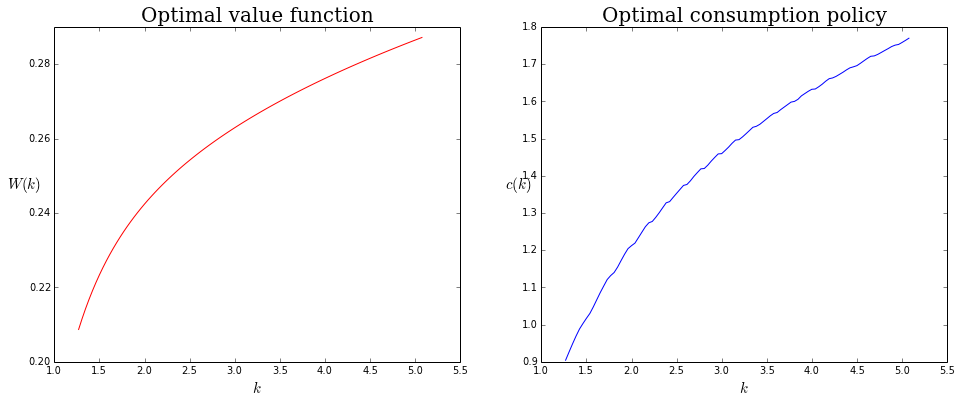

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

##### value function #####

# plot the value  function
axes[0].plot(Gk, final_w(Gk), 'r')

# labels, title, legend, etc
axes[0].set_xlabel('$k$', fontsize=15)
axes[0].set_ylabel("$W(k)$", rotation='horizontal', fontsize=15)
axes[0].set_title('Optimal value function', fontsize=20, family='serif')

##### consumption policy function #####

# plot the consumption policy function
axes[1].plot(Gk, consumption_policy(Gk), 'b')

# labels, title, legend, etc
axes[1].set_xlabel('$k$', fontsize=15)
axes[1].set_ylabel('$c(k)$', rotation='horizontal', fontsize=15)
axes[1].set_title('Optimal consumption policy', fontsize=20, family='serif')

plt.show()

Although the results above look sensible, it would be nice if we had an analytic result against which we could compare our numerical approximation. Turns out that the optimal savings mode with Cobb-Douglas production (i.e., $\sigma=1.0$), logarithmic preferences (i.e., $\theta=1.0$), and full depreciation (i.e., $\delta=1.0$) is known to have a closed form solution.

To derive the solution we use the "guess-and-verify" method. With these parameter restrictions, equation 1.19 implies that  

$$ (1-\beta)\frac{1}{c(k, z)}\alpha e^{z}k^{\alpha-1} = W'(k, z). \tag{2.1}$$

Guess that value function is log-linear: 

$$W(k, z) = A + B\ln\ k + C\ln e^z = A + B\ln\ k + C z \implies W'(k,z) = \frac{B}{k}.$$

Substitute this result into equation 2.1 and solve for the implied policy function $c(k, z)$:

$$\frac{B}{k} = (1-\beta)\frac{1}{c(k, z)}\alpha e^{z}k^{\alpha-1} \implies c(k, z) = \frac{\alpha(1-\beta)}{B} e^{z}k^{\alpha}$$

Now plug value function guess and its implied policy function into equation 1.20.

\begin{align}
A + B\ln k + Cz =& (1 - \beta) \ln\bigg(c(k, z)\bigg) + \beta E\left\{A + B\ln\bigg(e^{z}k^{\alpha} - c(k, z)\bigg) + C \bigg(\rho_z z + \epsilon'\bigg)\right\} \\
=& (1 - \beta) \ln\bigg(\frac{\alpha(1-\beta)}{B} e^{z}k^{\alpha}\bigg) + \beta E\left\{A + B\ln\bigg(e^{z}k^{\alpha} - \frac{\alpha(1-\beta)}{B} e^{z}k^{\alpha}\bigg) + C \bigg(\rho_z z + \epsilon'\bigg)\right\}\\
=& (1 - \beta) \ln\bigg(\frac{\alpha(1-\beta)}{B} e^{z}k^{\alpha}\bigg) + \beta E\left\{A + B\ln\bigg(\frac{B - \alpha(1-\beta)}{B} e^{z}k^{\alpha}\bigg) + C \bigg(\rho_z z + \epsilon'\bigg)\right\}\\
=& (1 - \beta) \ln\bigg(\frac{\alpha(1-\beta)}{B}\bigg) + (1 - \beta)z + \alpha(1-\beta)\ln k + \beta A + \beta B\ln\bigg(\frac{B - \alpha(1-\beta)}{B}\bigg) + \beta B z + \alpha\beta B \ln k + \beta\rho_z C z\\
=& \Bigg[\beta A + \beta B\ln\bigg(\frac{B - \alpha(1-\beta)}{B}\bigg) + (1 - \beta) \ln\bigg(\frac{\alpha(1-\beta)}{B}\bigg)\Bigg] + \Bigg[\alpha(1-\beta) + \alpha\beta B\Bigg] \ln k + \Bigg[(1 - \beta) + \beta B + \beta\rho_z C\Bigg] z\\
\end{align}

Applying the method of undetermined coefficients implies that...

\begin{align}
A =& \beta A + \beta B\ln\bigg(\frac{B - \alpha(1-\beta)}{B}\bigg) + (1 - \beta) \ln\bigg(\frac{\alpha(1-\beta)}{B}\bigg) \\
B =& \alpha(1-\beta) + \alpha\beta B \\
C =& (1 - \beta) + \beta B + \beta\rho_z C
\end{align}

Solving this system of non-linear equations for the unknown coefficients $A$, $B$, and $C$ yields...

\begin{align}
A = & \frac{\alpha\beta}{1 - \alpha\beta}\ln(\alpha\beta) + \ln(1 - \alpha\beta) \\
B = & \frac{\alpha(1-\beta)}{1 - \alpha\beta} \\
C = & \frac{1 - \beta}{1 - \beta\rho_z} + \frac{\alpha\beta(1-\beta)}{1 - \alpha\beta}
\end{align}

In order to confirm that our guess of the value function was correct, we can substitute its implied policy function

$$c(k, z) = (1 - \alpha\beta)e^{z}k^{\alpha} \tag{2.2}$$

into equation 1.10 (i.e., the consumption Euler equation) and check whether or not we recover the correct equation of motion for capital.

In [29]:
# anaytic values for the parameters
alpha = 0.33
sigma = 1.0
delta = 1.0
beta  = 0.96
theta = 1.0

# confirm that k_star is finite!
k_star_isfinite()

True

In [30]:
# coefficients used to define the analytic value and policy functions
A = ((alpha * beta) / (1 - alpha * beta)) * np.log(alpha * beta) + np.log(1 - alpha * beta)
B = (alpha * (1 - beta)) / (1 - alpha * beta)
C = ((1 - beta) / (1 - beta * rho_z)) + ((alpha * beta * (1 - beta)) / (1 - alpha * beta))

In [31]:
def analytic_w(k, z=0.0):
    """
    Analytic solution for the value function with Cobb-Douglas production,
    logarithmic preferences and full deprectiation.

    """
    return A + B * np.log(k) + C * z

def analytic_c(k, z=0.0):
    """
    Analytic solution for the optimal consumption policy function
    with Cobb-Douglas production, logarithmic preferences and full depreciation.
    
    """
    return (1 - alpha * beta) * np.exp(z) * k**alpha

In [32]:
# construct a grid of values for capital
Nk   = 100
kmin = 0.5 * k_star()
kmax = 2.0 * k_star()
Gk   = np.linspace(kmin, kmax, Nk)

# define a convergence tolerance
tol = 0.01 * (1 - beta)

# specify an initial guess of zero net investment
init_vals = crra_utility(ces_output(Gk) - delta * Gk)
w0 = interpolate.UnivariateSpline(Gk, init_vals, k=1, s=0) 

In [33]:
# compute the value function using VFI
final_w = solve_VFI(init_v=w0, 
                    T=deterministic_bellman_operator,
                    tol=tol,
                    pts=Gk,
                    mesg=True)

After 3 iterations, the final change is 6.26972116304e-05


In [34]:
# compute the optimal consumption policy
consumption_policy = deterministic_greedy_operator(final_w)

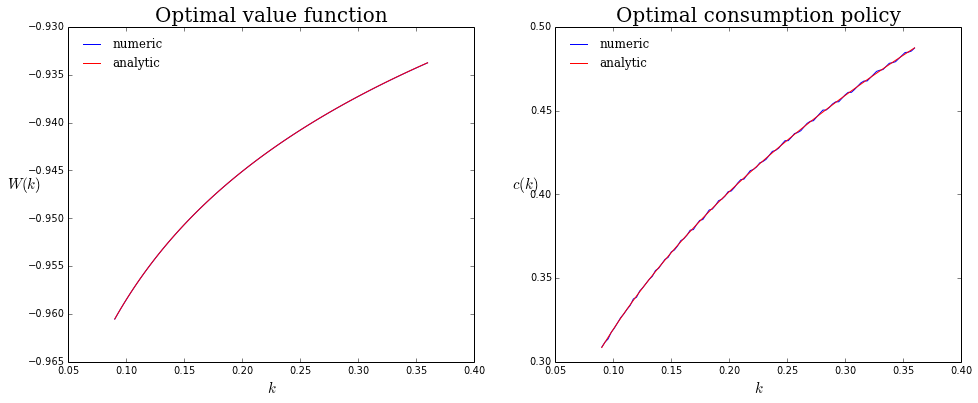

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

##### value function #####

# plot the value  function
axes[0].plot(Gk, final_w(Gk), 'b', label='numeric')

# plot the analytic value function
axes[0].plot(Gk, analytic_w(Gk), 'r', label='analytic')
             
# labels, title, legend, etc
axes[0].set_xlabel('$k$', fontsize=15)
axes[0].set_ylabel("$W(k)$", rotation='horizontal', fontsize=15)
axes[0].set_title('Optimal value function', fontsize=20, family='serif')
axes[0].legend(loc='best', frameon=False, prop={'family':'serif'})

##### consumption policy function #####

# plot the consumption policy function
axes[1].plot(Gk, consumption_policy(Gk), 'b', label='numeric')

# plot the analytic consumption policy function
axes[1].plot(Gk, analytic_c(Gk), 'r', label='analytic')

# labels, title, legend, etc
axes[1].set_xlabel('$k$', fontsize=15)
axes[1].set_ylabel('$c(k)$', rotation='horizontal', fontsize=15)
axes[1].set_title('Optimal consumption policy', fontsize=20, family='serif')
axes[1].legend(loc='best', frameon=False, prop={'family':'serif'})

plt.show()

## Assessing approximation error

Assessing numerical approximation error is an important part of any computational analysis. 

### Graphical measure of approximation error

Always plot your residuals!

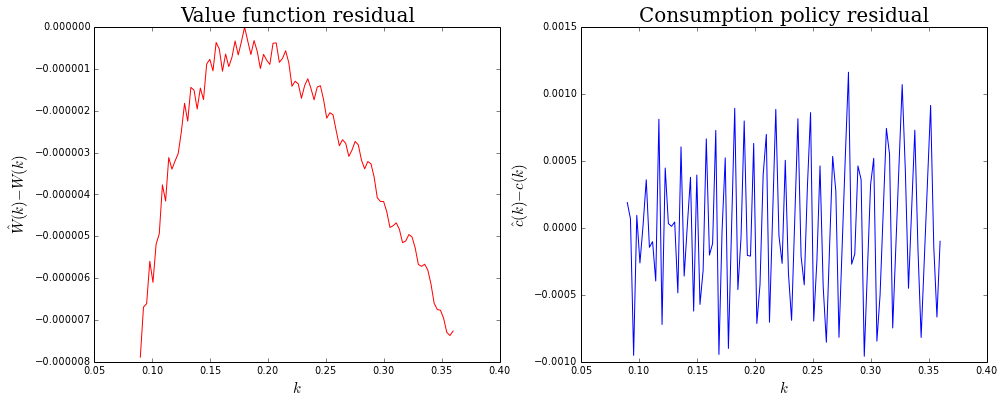

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

##### value function residual #####

# plot the value function residual
residual = final_w(Gk) - analytic_w(Gk)
axes[0].plot(Gk, residual, 'r')

# labels, title, legend, etc
axes[0].set_xlabel('$k$', fontsize=15)
axes[0].set_ylabel("$\hat{W}(k) - W(k)$", fontsize=15)
axes[0].set_title('Value function residual', fontsize=20, family='serif')

##### consumption policy residual #####

## plot the consumption policy residual
residual = consumption_policy(Gk) - analytic_c(Gk)
axes[1].plot(Gk, residual, 'b')

# labels, title, legend, etc
axes[1].set_xlabel('$k$', fontsize=15)
axes[1].set_ylabel("$\hat{c}(k) - c(k)$", fontsize=15)
axes[1].set_title('Consumption policy residual', fontsize=20, family='serif')

plt.show()

### Mathematical measures of approximation error
We can compare our numerical approximations of the closed-form policy functions using the $L^2$ and $L^{\infty}$ norms.  Recall that the $L^2$ norm, which is defined as

$$L^2 errors = \left[\sum_{k\in G_k} \bigg(\hat{k}'(k) - k'(k)\bigg)^2\right]^{\frac{1}{2}} $$

is a measure of the *total* approximation error. Meanwhile, the $L^{\infty}$ norm, which is defined as

$$L^{\infty} errors = \max_{k\in G_k} \bigg|\hat{k}'(k) - k'(k)\bigg| $$

is a measure of the point-wise approximation error.

In [37]:
def get_L2_errors(pol1, pol2):
    """
    Computes a measure of total difference between policy functions 
    using the L2 norm. Function requires that both pol1 and pol2 have 
    the same shape.
    
    Arguments:
    
        pol1: (array) Array of values representing a policy function.
        pol2: (array) Array of values representing a policy function.
        
    Returns:
    
        error: (float) L2 error.
    
    """
    error = np.sum((pol1 - pol2)**2)**0.5
    return error

def get_maximal_errors(pol1, pol2):
    """
    Computes a measure of point-wise difference between policy functions 
    using the L_infty norm. Function requires that both pol1 and pol2 
    have the same shape.
    
    Arguments:
    
        pol1: (array) Array of values representing a policy function.
        pol2: (array) Array of values representing a policy function.
        
    Returns:
    
        error: (float) L_infty error.
    
    """
    error = np.max(np.abs(pol1 - pol2))
    return error

In [38]:
# L2 errors for the consumption_policy policy function
get_L2_errors(pol1=consumption_policy(Gk), pol2=analytic_c(Gk))

0.0053022270615602869

In [39]:
# maximal error for the consumption policy function
get_maximal_errors(pol1=consumption_policy(Gk), pol2=analytic_c(Gk))

0.0011624262883965231

### Economic measures of approximation error
In cases for which no analytic solution exists we can still find an economic measure of approximation error.  We know that the following Euler equation must hold

$$ c(k, k'(k))^{-\theta} = \beta c(k'(k), k''(k'))^{-\theta}(1 + r(k'(k)) $$

Define the Euler residual 

In [40]:
def get_euler_residual(cpol, k, z=None, T=100, normed=True):
    """
    Residual of the consumption Euler equation.
    
    Arguments:
    
        cpol:   (callable) Callable consumption policy function.
        k:      (array) Values of capital at which to compute the 
                Euler residual.
        z:      (array) Values of total factor productivity at which 
                to compute the Euler residual. Default is None.
        T:      (int) Number of draws to use when computing 
        normed: (boolean) Whether or not you wish to normalize the
                Euler residuals by the level of consumption.
                
    Returns:
    
        resid: (array) Array of values containing the Euler residuals.
    
    """
    # deterministic case
    if z == None:
        # compute next period's capital stock and mpk
        kplus = capital_motion(k, 0, cpol(k))
        rplus = ces_mpk(kplus)
    
        # compute the Euler residual
        resid = cpol(k)**-theta - beta * cpol(kplus)**-theta * (1 + rplus - delta)
        
        if normed == True:
            resid = resid / cpol(k)
            
    # stochastic case
    else:
        # storage container for residual
        resid = np.empty((Nk, Nz))
        
        # to compute next period's mpk need to simulate some shocks
        eps   = stats.norm(0, sigma_z)
        
        # compute the Euler residual (should be more efficient way to do this using broadcasting)
        for j, zval in enumerate(z):
            zplus = productivity_motion(zval, eps.rvs(T))
            for i, kval in enumerate(k):
                
                # compute next period's capital stock 
                kplus = np.repeat(capital_motion(kval, zval, cpol(kval, zval)), zplus.size)
                rplus = ces_mpk(kplus, zplus)
                
                # compute the residual using Monte Carlo integration
                resid[i,j] = (cpol.ev(kval, zval)**-theta - 
                              beta * np.mean(cpol.ev(kplus, zplus)**-theta * (1 + rplus - delta)))
        
        if normed == True:
          resid = resid / cpol(k[:,np.newaxis], z)
    
    return resid

Plotting the Euler residuals is a good way to understand which portions of the state space you are relatively approximating well.

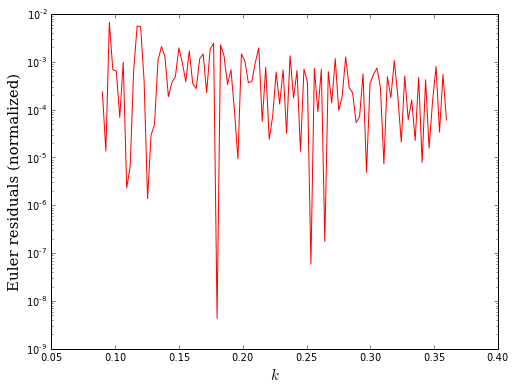

In [41]:
plt.figure(figsize=(8,6))

# compute Euler residuals
euler_residuals = get_euler_residual(cpol=consumption_policy, k=Gk, normed=True)

# standard is to plot squared Euler residuals
plt.plot(Gk, euler_residuals**2, 'r')
plt.yscale('log')

plt.xlabel('$k$', fontsize=15)
plt.ylabel('Euler residuals (normalized)', fontsize=15, family='serif')

plt.show()

In [42]:
# for a point estimate of approximation error use the average Euler residual
np.mean(euler_residuals)

0.00059534797351319679

### Exercise

Now that we have confirmed that the code is working, and discussed how to use it, I want you to play around with solving for the optimal value and policy functions. Some things to think about...

* Change parameters. For which values of the parameters is the consumption policy function "roughly" linear? For which values of the parameters is the consumption policy function highly non-linear?
* Increase the number of grid points, `Nk`. What is the relationship between the number of grid points and the time it takes to compute the solution? What is the relationship between the number of grid points and the accuracy of the computed solution?
* Change `kmin` and/or `kmax`. What is the relationship between the size of the grid and the time it takes to compute the solution? What is the relationship between the size of the grid and the accuracy of the computed solution?
* Change the convergence tolerance. What is the relationship between the convergence tolerance and the he time it takes to compute the solution?

In [58]:
# define model parameters
alpha = 0.45
beta  = 0.96
delta = 0.05
sigma = 0.85
theta = 2.5

# confirm that k_star is finite!
k_star_isfinite()

True

In [59]:
# construct a grid of values for capital
Nk   = 1000
kmin = 0.5 * k_star()
kmax = 2.5 * k_star()
Gk   = np.linspace(kmin, kmax, Nk)

# define a convergence tolerance
tol = 0.01 * (1 - beta)

# specify an initial guess of zero net investment
init_vals = crra_utility(ces_output(Gk) - delta * Gk)
w0 = interpolate.UnivariateSpline(Gk, init_vals, k=1, s=0) 

In [60]:
# compute the value function using VFI
final_w = solve_VFI(init_v=w0, 
                    T=deterministic_bellman_operator,
                    tol=tol,
                    pts=Gk,
                    mesg=True)

After 10 iterations, the change is 0.000839931121629
After 15 iterations, the final change is 0.000395013439509


In [61]:
# how long does it take to compute the solution?
%timeit -n 1 -r 1 solve_VFI(init_v=w0, T=deterministic_bellman_operator, tol=tol, pts=Gk)

1 loops, best of 1: 43 s per loop


In [62]:
# compute the optimal consumption policy
consumption_policy = deterministic_greedy_operator(final_w)

In [63]:
# how long does it take to compute the policy function
%timeit -n 1 -r 1 deterministic_greedy_operator(final_w)

1 loops, best of 1: 2.77 s per loop


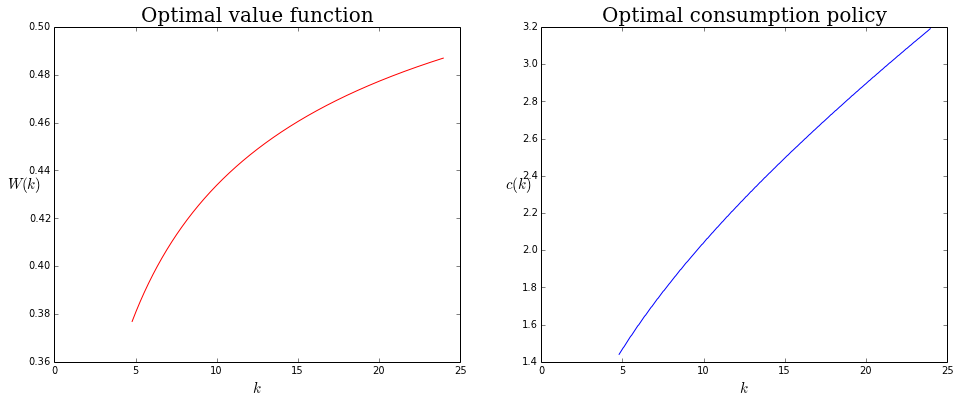

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

##### value function #####

# plot the value  function
axes[0].plot(Gk, final_w(Gk), 'r')

# labels, title, legend, etc
axes[0].set_xlabel('$k$', fontsize=15)
axes[0].set_ylabel("$W(k)$", rotation='horizontal', fontsize=15)
axes[0].set_title('Optimal value function', fontsize=20, family='serif')

##### consumption policy function #####

# plot the consumption policy function
axes[1].plot(Gk, consumption_policy(Gk), 'b')

# labels, title, legend, etc
axes[1].set_xlabel('$k$', fontsize=15)
axes[1].set_ylabel('$c(k)$', rotation='horizontal', fontsize=15)
axes[1].set_title('Optimal consumption policy', fontsize=20, family='serif')

plt.show()

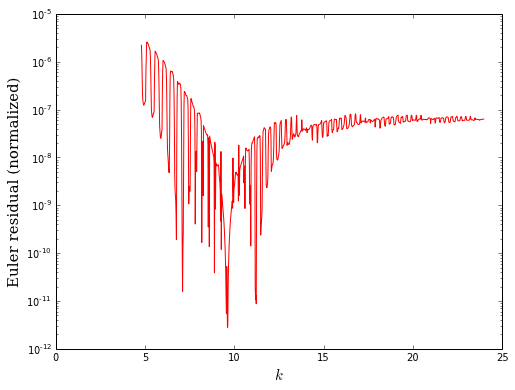

In [65]:
plt.figure(figsize=(8,6))

# compute Euler residuals
euler_residuals = get_euler_residual(cpol=consumption_policy, k=Gk, normed=True)
plt.plot(Gk, euler_residuals**2, 'r')
plt.yscale('log')

plt.xlabel('$k$', fontsize=15)
plt.ylabel('Euler residual (normalized)', fontsize=15, family='serif')

plt.show()

In [66]:
# average Euler residual
np.mean(euler_residuals)

-5.6875794302890246e-05

# Stochastic dynamic programming

Now we extend the model by incorporating an AR(1) process driving total factor productivity. Incorporating a correlated productivity shock requires us to keep track of a second state variable (i.e., the current value of total factor productivity!). 

In [67]:
def randomized_bellman_operator(w):
    """
    The randomized Bellman operator, R, from Stachurski and Pal (2012). 
    Approximation of the value surface is done using bi-linear interpolation.

    Arguments:

        w: (object) An instance of the RectBivariateSpline class.

    Returns: 

        Tw: (object) A callable RectBivariateSpline object.

    """
    new_vals = np.zeros((Nk, Nz))
    
    for j, z in enumerate(Gz):
        
        # make next period's shock conditional on current z
        zplus = rho_z * z + epsilon_z
        
        for i, k in enumerate(Gk):
            
            def obj(c):
                """Current value function."""
                # for some reason, v.ev doesn't broadcast!
                kplus = np.repeat(capital_motion(k, z, c), zplus.size)
                
                # note use of convex combination of u and E[v]!
                tmp_v = (1 - beta) * crra_utility(c) + beta * np.mean(w.ev(kplus, zplus))
                
                return tmp_v
                         
            # find the value of the control that maximizes the current value function 
            pol = maximize(obj, 0, Gamma(k, z))
            # update the value function with maximum value of obj
            new_vals[i, j] = obj(pol)
        
    # interpolate
    
    Tv = interpolate.RectBivariateSpline(Gk, Gz, new_vals, kx=1, ky=1)
    
    return Tv

def randomized_greedy_operator(w):
    """
    The randomized Greedy operator, R, from Stachurski and Pal (2012). 
    Approximation of the policy surface is done using bi-linear interpolation.

    Arguments:

        w: (object) An instance of the RectBivariateSpline class.

    Returns: 

        Tw: (object) A callable RectBivariateSpline object.

    """
    new_pols = np.zeros((Nk, Nz))
    
    for j, z in enumerate(Gz):
        
        # make next period's shock conditional on current z
        zplus = rho_z * z + epsilon_z
        
        for i, k in enumerate(Gk):
            
            def obj(c):
                """Current value function."""
                # for some reason, v.ev doesn't broadcast!
                kplus = np.repeat(capital_motion(k, z, c), zplus.size)
                
                # note use of convex combination of u and E[w]!
                tmp_v = (1 - beta) * crra_utility(c) + beta * np.mean(w.ev(kplus, zplus))
                
                return tmp_v
                         
            # find the value of the control that maximizes the current value function 
            pol = maximize(obj, 0, Gamma(k, z))
            # update the policy function with maximizer of obj
            new_pols[i, j] = pol
        
    # interpolate
    Tv = interpolate.RectBivariateSpline(Gk, Gz, new_pols, kx=1, ky=1)
    
    return Tv

In [68]:
def solve_VFI_2D(init_v, T, tol, kpts, zpts, mesg=False, **kwargs):
    """
    Basic implementation of Value Iteration Algorithm.

    Arguments:

        init_v:   Initial guess of the true value function. A good initial
                  guess can save a substantial amount of computational time.
                  
        T:        A pre-defined Bellman operator.
        
        tol:      Convergence criterion. Algorithm will terminate when 
                  the supremum norm distance between successive value 
                  function iterates is less than tol.
                  
        kpts:     Grid of value for capital over which to compare value 
                  function iterates.
                  
        zpts:     Grid of value for total factor productivity over which to 
                  compare value function iterates.
        
        mesg:     Should messages be printed detailing convergence progress?
                  Default is False.

    Returns: 

        final_v: (object) Callable object representing the value function.
        
    """

    # keep track of number of iterations
    n_iter = 0

    ##### Value iteration algorithm #####
    current_v = init_v

    while True:
        next_v = T(current_v, **kwargs)
        # supremum norm convergence criterion
        change = np.max(np.abs(next_v(kpts, zpts) - current_v(kpts, zpts)))
        n_iter += 1
    
        # check for convergence
        if change < tol:
            if mesg == True:
                print "After", n_iter, "iterations, the final change is", change
            final_v = next_v
            break
    
        # print progress every 5 iterations
        if n_iter % 5 == 0 and mesg == True:
            print "After", n_iter, "iterations, the change is", change
        
        current_v = next_v
    
    return final_v

In [69]:
# define model parameters
alpha   = 0.33
beta    = 0.96
delta   = 1.0
sigma   = 1.0
theta   = 1.0
sigma_z = 0.01
rho_z   = 0.95

# confirm that k_star is finite!
k_star_isfinite()

True

In [70]:
# grid of values for k
Nk   = 100
kmax = 1.5 * k_star()
kmin = 0.5 * k_star()
Gk   = np.linspace(kmin, kmax, Nk)

# grid of values for z (always make Nz odd!)
Nz   = 11
zmin = -3 * sigma_z
zmax = 3 * sigma_z
Gz   = np.linspace(zmin, zmax, Nz)

# specify a convergence criterion
tol = 0.01 * (1 - beta)

# number of random draws for TFP shock (only need to do this once!)
np.random.seed(42)
T = 100
epsilon_z = np.random.normal(0, sigma_z, T)

# initialize value function using consumption policy that leads to zero net investment
zero_net_policy = ces_output(Gk[:,np.newaxis], Gz) - delta * Gk[:,np.newaxis]
init_vals       = crra_utility(zero_net_policy)
w0 = interpolate.RectBivariateSpline(Gk, Gz, init_vals, kx=1, ky=1, s=0)

In [71]:
# compute the value function using VFI
final_w = solve_VFI_2D(init_v=w0, 
                       T=randomized_bellman_operator,
                       tol=tol,
                       kpts=Gk,
                       zpts=Gz,
                       mesg=True)

After 5 iterations, the change is 0.00298711235442
After 10 iterations, the change is 0.00138105436677
After 15 iterations, the change is 0.000623535406505
After 18 iterations, the final change is 0.00038461043733


We can plot the value surface in 3D...

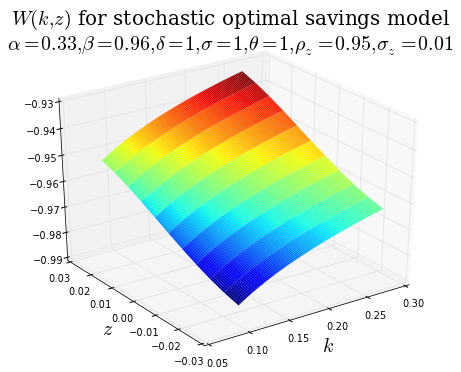

In [72]:
fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111, projection='3d', azim=-125)

# generate the coordinates for plotting
k_coords, z_coords = np.meshgrid(Gk, Gz, indexing='ij')

# generate a surface plot
ax.plot_surface(k_coords, z_coords, final_w(Gk, Gz), rstride=1, cstride=1, cmap=mpl.cm.jet,
                linewidth=0.0)

# axes, labels, title, etc
ax.set_ylabel('$z$', fontsize=20)
ax.set_xlabel('$k$', fontsize=20)
ax.set_title('$W(k, z)$ for stochastic optimal savings model\n' + \
             r'$\alpha=%g, \beta=%g, \delta=%g, \sigma=%g, \theta=%g, \rho_z=%g, \sigma_z=%g$' \
             %(alpha, beta, delta, sigma, theta, rho_z, sigma_z), fontsize=20, family='serif')
plt.show()

...and, because we derived an analytic result for these parameters, we can compute $L^2$ and $L^{\infty}$ errors.

In [73]:
# compute the L2 errors
get_L2_errors(final_w(Gk, Gz), analytic_w(Gk[:,np.newaxis], Gz))

0.25554003851924406

In [74]:
# compute the maximal errors
get_maximal_errors(final_w(Gk, Gz), analytic_w(Gk[:,np.newaxis], Gz))

0.0085297373147352751

Now we compute the optimal consumption policy

In [75]:
# compute the optimal consumption policy
consumption_policy = randomized_greedy_operator(final_w)

Another way of plotting functions of two variables is to make use of contour plots.

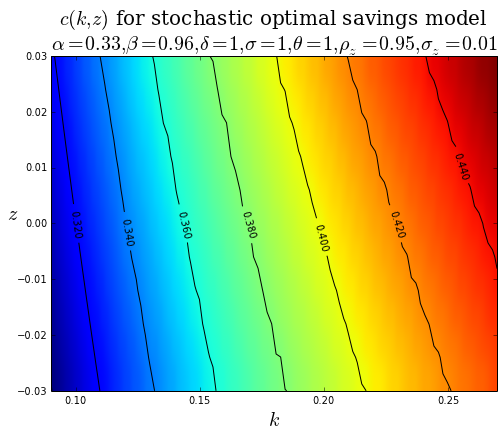

In [76]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

# one way of generating a contour plot using Matplotlib
ax.imshow(consumption_policy(Gk, Gz).T, cmap=mpl.cm.jet, origin='lower', interpolation='gaussian', 
          aspect='auto', extent=[kmin, kmax, zmin, zmax])

# add contour lines
CS = ax.contour(k_coords, z_coords, consumption_policy(Gk, Gz), 10, colors='k')
CS.clabel(colors='k')

# axes, labels, title, etc
ax.set_ylabel('$z$', fontsize=20, rotation='horizontal')
ax.set_xlabel('$k$', fontsize=20)
ax.set_title('$c(k, z)$ for stochastic optimal savings model\n' + \
             r'$\alpha=%g, \beta=%g, \delta=%g, \sigma=%g, \theta=%g, \rho_z=%g, \sigma_z=%g$' \
             %(alpha, beta, delta, sigma, theta, rho_z, sigma_z), fontsize=20, family='serif')

plt.show()

We can even use contour plots to look for patterns in the Euler residuals!

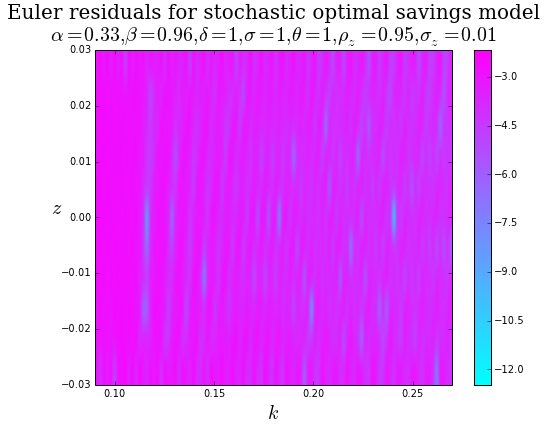

In [77]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

# compute and store normalized Euler residuals for all points in the state space
euler_residuals         = get_euler_residual(cpol=consumption_policy, k=Gk, z=Gz, T=1000)
log_square_euler_resids = np.log10(euler_residuals**2)

# plot the Euler residuals
resid_plot = ax.imshow(log_square_euler_resids.T, cmap=mpl.cm.cool, origin='lower', 
                       interpolation='gaussian', aspect='auto', extent=[kmin, kmax, zmin, zmax])

# add a colorbar to the plot
fig.colorbar(resid_plot)

# axes, labels, title, etc
ax.set_ylabel('$z$', fontsize=20, rotation='horizontal')
ax.set_xlabel('$k$', fontsize=20)
ax.set_title('Euler residuals for stochastic optimal savings model\n' + \
             r'$\alpha=%g, \beta=%g, \delta=%g, \sigma=%g, \theta=%g, \rho_z=%g, \sigma_z=%g$' \
             %(alpha, beta, delta, sigma, theta, rho_z, sigma_z), fontsize=20, family='serif')

plt.show()

In [78]:
# point estimate for the Euler residual is just the global average
np.mean(log_square_euler_resids)

-3.6893922788297808

Finally, we can plot the Euler residual for a particular value of either capital or TFP. Here is an example plot of the Euler residual for different values of capital assuming that the productivity shock is $z=0$.

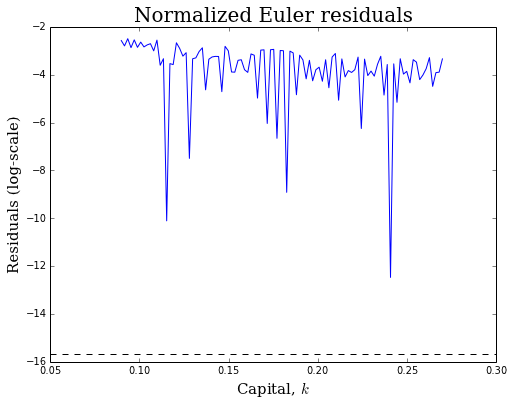

In [79]:
plt.figure(figsize=(8,6))

# plot the squared Euler residual for z=0
plt.plot(Gk, log_square_euler_resids[:, 5])
plt.axhline(np.log10(np.finfo('float').eps), ls='dashed', color='k')

# axes, labels, title, etc
plt.xlabel('Capital, $k$', fontsize=15, family='serif')
plt.ylabel('Residuals (log-scale)', fontsize=15, family='serif')
plt.title('Normalized Euler residuals', fontsize=20, family='serif')

plt.show()

### Exercise

Now that we have confirmed that the code is working, and discussed how to use it, I want you to play around with solving for the optimal value and policy functions. Some things to think about...

* Change parameters. For which values of the parameters is the consumption policy function "roughly" linear? For which values of the parameters is the consumption policy function highly non-linear?
* Increase the number of grid points, `Nk`. What is the relationship between the number of grid points and the time it takes to compute the solution? What is the relationship between the number of grid points and the accuracy of the computed solution?
* Change `kmin` and/or `kmax`. What is the relationship between the size of the grid and the time it takes to compute the solution? What is the relationship between the size of the grid and the accuracy of the computed solution?
* Change the convergence tolerance. What is the relationship between the convergence tolerance and the he time it takes to compute the solution?

In [80]:
# define model parameters
alpha   = 0.45
beta    = 0.96
delta   = 0.05
sigma   = 0.85
theta   = 2.5
sigma_z = 0.01
rho_z   = 0.95

# confirm that k_star is finite!
k_star_isfinite()

True

In [93]:
# grid of values for k
Nk   = 100
kmax = 1.25 * k_star()
kmin = 0.75 * k_star()
Gk   = np.linspace(kmin, kmax, Nk)

# grid of values for z (always make Nz odd!)
Nz   = 11
zmin = -5 * sigma_z
zmax = 5 * sigma_z
Gz   = np.linspace(zmin, zmax, Nz)

# specify a convergence criterion
tol = 0.01 * (1 - beta)

# number of random draws for TFP shock (only need to do this once!)
np.random.seed(42)
T = 1000
epsilon_z = np.random.normal(0, sigma_z, T)

# initialize value function using consumption policy that results in zero net investment 
zero_net_policy = ces_output(Gk[:,np.newaxis], Gz) - delta * Gk[:,np.newaxis]
init_vals = crra_utility(zero_net_policy)

w0 = interpolate.RectBivariateSpline(Gk, Gz, init_vals, kx=1, ky=1)

In [94]:
# compute the value function using VFI
final_w = solve_VFI_2D(init_v=w0, 
                       T=randomized_bellman_operator,
                       tol=tol,
                       kpts=Gk,
                       zpts=Gz,
                       mesg=True)

After 5 iterations, the change is 0.00963138020099
After 10 iterations, the change is 0.00737228007105
After 15 iterations, the change is 0.00578128452752
After 20 iterations, the change is 0.00458935005222
After 25 iterations, the change is 0.0036728257006
After 30 iterations, the change is 0.00295604030646
After 35 iterations, the change is 0.00238861387372
After 40 iterations, the change is 0.00193547209708
After 45 iterations, the change is 0.00157132652455
After 50 iterations, the change is 0.0012774015982
After 55 iterations, the change is 0.0010394191588
After 60 iterations, the change is 0.000846314447741
After 65 iterations, the change is 0.000689389039021
After 70 iterations, the change is 0.000561731802724
After 75 iterations, the change is 0.000457809257089
After 79 iterations, the final change is 0.000388736319336


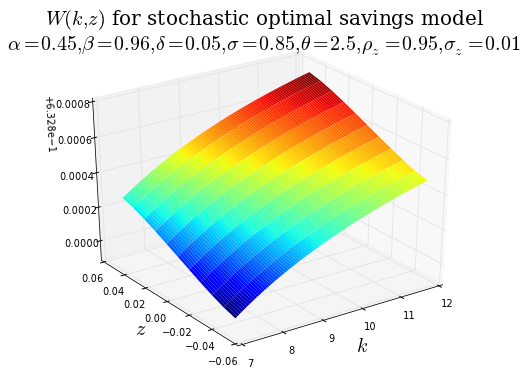

In [95]:
fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111, projection='3d', azim=-125)

# generate the coordinates for plotting
k_coords, z_coords = np.meshgrid(Gk, Gz, indexing='ij')

# generate a surface plot
ax.plot_surface(k_coords, z_coords, final_w(Gk, Gz), rstride=1, cstride=1, cmap=mpl.cm.jet,
                linewidth=0.0)

# axes, labels, title, etc
ax.set_ylabel('$z$', fontsize=20)
ax.set_xlabel('$k$', fontsize=20)
ax.set_title('$W(k, z)$ for stochastic optimal savings model\n' + \
             r'$\alpha=%g, \beta=%g, \delta=%g, \sigma=%g, \theta=%g, \rho_z=%g, \sigma_z=%g$' \
             %(alpha, beta, delta, sigma, theta, rho_z, sigma_z), fontsize=20, family='serif')
plt.show()

In [96]:
# compute the consumption policy function
consumption_policy = randomized_greedy_operator(final_w)

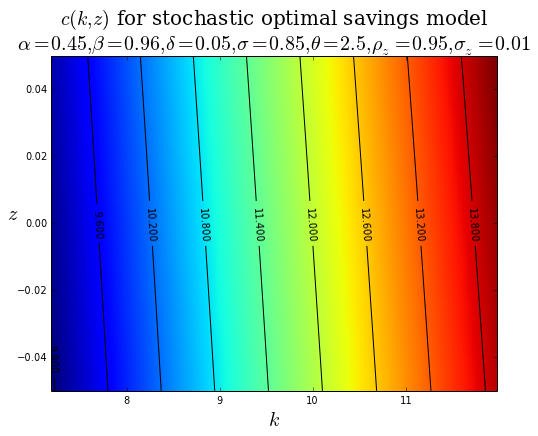

In [97]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

# one way of generating a contour plot using Matplotlib
ax.imshow(consumption_policy(Gk, Gz).T, cmap=mpl.cm.jet, origin='lower', interpolation='gaussian', 
          aspect='auto', extent=[kmin, kmax, zmin, zmax])

# add contour lines
CS = ax.contour(k_coords, z_coords, consumption_policy(Gk, Gz), 10, colors='k')
CS.clabel(colors='k')

# axes, labels, title, etc
ax.set_ylabel('$z$', fontsize=20, rotation='horizontal')
ax.set_xlabel('$k$', fontsize=20)
ax.set_title('$c(k, z)$ for stochastic optimal savings model\n' + \
             r'$\alpha=%g, \beta=%g, \delta=%g, \sigma=%g, \theta=%g, \rho_z=%g, \sigma_z=%g$' \
             %(alpha, beta, delta, sigma, theta, rho_z, sigma_z), fontsize=20, family='serif')

plt.show()

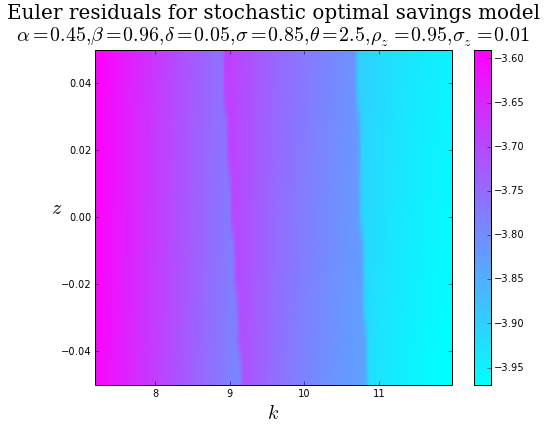

In [98]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

# compute and store normalize Euler residuals for all points in the state space
euler_residuals = get_euler_residual(cpol=consumption_policy, k=Gk, z=Gz, T=100)
log_squared_euler_residuals = np.log10(euler_residuals**2)

# plot the Euler residuals
resid_plot = ax.imshow(log_squared_euler_residuals.T, cmap=mpl.cm.cool, origin='lower', 
                       interpolation='gaussian', aspect='auto', 
                       extent=[kmin, kmax, zmin, zmax])

# add a colorbar to the plot
fig.colorbar(resid_plot)

# axes, labels, title, etc
ax.set_ylabel('$z$', fontsize=20, rotation='horizontal')
ax.set_xlabel('$k$', fontsize=20)
ax.set_title('Euler residuals for stochastic optimal savings model\n' + \
             r'$\alpha=%g, \beta=%g, \delta=%g, \sigma=%g, \theta=%g, \rho_z=%g, \sigma_z=%g$' \
             %(alpha, beta, delta, sigma, theta, rho_z, sigma_z), fontsize=20, family='serif')

plt.show()

In [99]:
# compute the global average of the log squared Euler residuals
np.mean(log_squared_euler_residuals)

-3.7792019097570928